In [1]:
%cd "~/moses-incons-pen-xp"
%load_ext autoreload
%autoreload 2

/home/xabush/moses-incons-pen-xp


In [13]:
import numpy as np
import pandas as pd
import scipy
import math
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
import math
from sklearn.model_selection import train_test_split
from datetime import datetime
from notebooks.manifold_reg.util import *
from notebooks.manifold_reg.custom_model import *

In [78]:
X, beta, y_log = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.5, stratify=y_log)

In [80]:
assoc_mat = get_assoc_mat(200, 10)

In [138]:
n_iter = 15
l1_vals = np.logspace(-2, 0, n_iter)
# l1_vals = np.concatenate([np.array([0]), l1_vals])
l2_vals = np.logspace(-5, 1, n_iter)
# l2_vals = np.concatenate([np.array([0]), l2_vals])
gammas = np.logspace(-2, 3, 10)

In [134]:
gammas

array([1.00000000e-02, 3.59381366e-02, 1.29154967e-01, 4.64158883e-01,
       1.66810054e+00, 5.99484250e+00, 2.15443469e+01, 7.74263683e+01,
       2.78255940e+02, 1.00000000e+03])

Run Logistic regression with $\Vert\beta\Vert^{2}$ and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ using **gradient descent**

In [143]:
from notebooks.manifold_reg.grad_util import run_logisitic_reg_exp, build_table_from_log

train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0, \
    train_l1_pen_0, test_l1_pen_0, train_l2_pen_0, test_l2_pen_0, min_l1_vals_0, min_l2_vals_0, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=True)

res_1_df = build_table_from_log(gammas, train_errs_cv_0, test_errs_0, train_ll_pen_0, test_ll_pen_0,
                                train_l1_pen_0, test_l1_pen_0, min_l1_vals_0, train_l2_pen_0, test_l2_pen_0, min_l2_vals_0)

res_1_df

[2022-02-15 16:11:34.502872] - gamma - 0.01
Min l1: 0.2682695795279725, Min l2: 1e-05, CV Error: 0.5769900884638564, Test error: 0.6254482489765507
ll_pen_train: 0.05955479709965015, l1_pen_train: 0.5892049243541102, l2_pen_train: 0.0
[2022-02-15 16:13:44.779864] - gamma - 0.04
Min l1: 0.2682695795279725, Min l2: 1e-05, CV Error: 0.5769900884638564, Test error: 0.6254482489765507
ll_pen_train: 0.05955479709965015, l1_pen_train: 0.5892049243541102, l2_pen_train: 0.0
[2022-02-15 16:15:58.497024] - gamma - 0.13
Min l1: 0.2682695795279725, Min l2: 1e-05, CV Error: 0.5769900884638564, Test error: 0.6254482489765507
ll_pen_train: 0.05955479709965015, l1_pen_train: 0.5892049243541102, l2_pen_train: 6.79241301302733e-150
[2022-02-15 16:18:12.597420] - gamma - 0.46
Min l1: 0.2682695795279725, Min l2: 10.0, CV Error: 0.5769900866620149, Test error: 0.6254482489765505
ll_pen_train: 0.05955479984159088, l1_pen_train: 0.5892049141334897, l2_pen_train: 3.49998089932839e-10
[2022-02-15 16:20:28.06981

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.010000,0.576990,0.26827,0.000010,0.059555,0.589205,0.000000e+00,0.625448,0.066470,0.625263,0.000000e+00
1,0.035938,0.576990,0.26827,0.000010,0.059555,0.589205,0.000000e+00,0.625448,0.066470,0.625263,0.000000e+00
2,0.129155,0.576990,0.26827,0.000010,0.059555,0.589205,6.792413e-150,0.625448,0.066470,0.625263,6.078412e-240
3,0.464159,0.576990,0.26827,10.000000,0.059555,0.589205,3.499981e-10,0.625448,0.066470,0.625263,2.538113e-17
4,1.668101,0.567414,0.01000,0.000027,0.059675,0.605218,2.880949e+03,0.651786,0.025204,0.883369,1.527142e+03
5,5.994843,0.584650,0.01000,0.000010,0.179970,0.356186,1.307372e+04,0.610815,0.218340,0.345937,1.351301e+04
6,21.544347,0.589445,0.01000,0.000010,0.203857,0.327080,1.340773e+04,0.615871,0.262104,0.297602,1.356279e+04
7,77.426368,0.589839,0.01000,0.000010,0.205796,0.324859,1.342737e+04,0.616331,0.265682,0.293990,1.354744e+04
8,278.255940,0.589870,0.01000,0.000010,0.205946,0.324688,1.342885e+04,0.616366,0.265960,0.293711,1.354613e+04
9,1000.000000,0.589872,0.01000,0.000010,0.205958,0.324674,1.342897e+04,0.616369,0.265981,0.293689,1.354603e+04


Run Logistic regression with $\Vert\beta\Vert^{1}$ and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ using **gradient descent**

In [142]:
from notebooks.manifold_reg.grad_util import run_logisitic_reg_exp, build_table_from_log

# l1_vals = np.logspace(-2, 0, n_iter)
# l1_vals = np.concatenate([np.array([0]), l1_vals])
# l2_vals = np.logspace(-4, -2, n_iter)

train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, _ = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas, l1_vals, l2_vals, l2_norm=False)

res_2_df = build_table_from_log(gammas, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

res_2_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,0.010000,0.311090,0.01,0.00001,0.045833,1.166332,0.000000e+00,0.321377,0.050730,1.224226,0.000000e+00
1,0.035938,0.311090,0.01,0.00001,0.045833,1.166332,0.000000e+00,0.321377,0.050730,1.224226,0.000000e+00
2,0.129155,0.311090,0.01,0.00001,0.045833,1.166332,9.646617e-150,0.321377,0.050730,1.224226,8.307552e-240
3,0.464159,0.307458,0.01,0.00001,0.045420,1.184276,5.674341e-10,0.321377,0.050730,1.224226,4.708862e-17
4,1.668101,0.352539,0.01,0.00001,0.067738,0.965589,2.906796e+03,0.330691,0.058083,1.146041,1.139825e+03
5,5.994843,0.464121,0.01,0.00001,0.212085,0.509399,1.051602e+04,0.479016,0.252168,0.496075,1.084777e+04
6,21.544347,0.475221,0.01,0.00001,0.234177,0.476295,1.094151e+04,0.501250,0.292731,0.426131,1.108578e+04
7,77.426368,0.476369,0.01,0.00001,0.236298,0.469509,1.094436e+04,0.505856,0.297700,0.401474,1.096095e+04
8,278.255940,0.475674,0.01,0.00001,0.235676,0.474717,1.100482e+04,0.504312,0.296433,0.413617,1.107132e+04
9,1000.000000,0.477396,0.01,0.00001,0.236733,0.466923,1.092423e+04,0.504028,0.297640,0.415934,1.097971e+04


Focus on $\gamma$ values between 1 and 10 with $\Vert\beta\Vert^{2}$ norm and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$

In [87]:
gammas_2 = np.logspace(0, 1, 5)

train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas_2, l1_vals, l2_vals)

res_3_df = build_table_from_log(gammas_2, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals)

res_3_df

[2022-02-14 16:59:04.922861] - gamma - 1.00


/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:174: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y * f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:174: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y * f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:174: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y * f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:155: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:174: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y * f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-incons-pen-xp/notebooks/manifold_reg/util.py:174: RuntimeWarning: overflow encountered in exp
  log_ll = np.sum((y * f) - np.log(1 + np.exp(f))) / m
/home/xabush/moses-

Min l1: 0.01, Min l2: 0.003727593720314938
Min l1: 0.01, Min l2: 0.003727593720314938, CV Error: 0.5660912319199845, Test error: 0.7521788724751501
ll_pen_train: 0.061279957275408956, l1_pen_train: 0.6022998452632564, l2_pen_train: 20.84831430189933
[2022-02-14 17:01:41.507684] - gamma - 1.78
Min l1: 0.01, Min l2: 0.0001
Min l1: 0.01, Min l2: 0.0001, CV Error: 0.584691871499565, Test error: 0.6098486567466913
ll_pen_train: 0.18417599467521603, l1_pen_train: 0.34973165150679275, l2_pen_train: 1312.1349839314018
[2022-02-14 17:04:15.699290] - gamma - 3.16
Min l1: 0.01, Min l2: 0.0001
Min l1: 0.01, Min l2: 0.0001, CV Error: 0.6358117338498055, Test error: 0.6420857875196401
ll_pen_train: 0.42962335367341903, l1_pen_train: 0.14659845240312205, l2_pen_train: 1048.0718482958812
[2022-02-14 17:06:52.998821] - gamma - 5.62
Min l1: 0.01, Min l2: 0.0001
Min l1: 0.01, Min l2: 0.0001, CV Error: 0.651508719980073, Test error: 0.6622057265245619
ll_pen_train: 0.5056504221155949, l1_pen_train: 0.1084

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.000000,0.566091,0.01,0.003728,0.061280,0.602300,20.848314,0.752179,0.004730,1.276973,1.633719
1,1.778279,0.584692,0.01,0.000100,0.184176,0.349732,1312.134984,0.609849,0.095534,0.557098,1010.525820
2,3.162278,0.635812,0.01,0.000100,0.429623,0.146598,1048.071848,0.642086,0.427269,0.164636,1054.511422
3,5.623413,0.651509,0.01,0.000100,0.505650,0.108486,788.591740,0.662206,0.541399,0.104773,648.132301
4,10.000000,0.655818,0.01,0.000100,0.526677,0.099557,707.218953,0.667280,0.569078,0.094106,532.443634


Focus on $\gamma$ values between 1 and 10 with $\Vert\beta\Vert^{1}$ norm and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$

In [88]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, gammas_2, l1_vals, l2_vals, l2_norm=False)

res_4_df = build_table_from_log(gammas_2, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals)

res_4_df

[2022-02-14 17:21:21.259711] - gamma - 1.00
Min l1: 0.013894954943731374, Min l2: 0.00013894954943731373
Min l1: 0.013894954943731374, Min l2: 0.00013894954943731373, CV Error: 0.31194770675836914, Test error: 0.31450969581794275
ll_pen_train: 0.06141616136543361, l1_pen_train: 1.7200127470823232, l2_pen_train: 28.515920733434587
[2022-02-14 17:31:13.264108] - gamma - 1.78
Min l1: 0.013894954943731374, Min l2: 0.0001
Min l1: 0.013894954943731374, Min l2: 0.0001, CV Error: 0.460898544629222, Test error: 0.4321875637558583
ll_pen_train: 0.225361207747424, l1_pen_train: 0.7094277989239297, l2_pen_train: 1004.6355231457126
[2022-02-14 17:41:09.419285] - gamma - 3.16
Min l1: 0.013894954943731374, Min l2: 0.0001
Min l1: 0.013894954943731374, Min l2: 0.0001, CV Error: 0.5763477694070474, Test error: 0.5752244987226802
ll_pen_train: 0.4544568240682104, l1_pen_train: 0.2990179393112409, l2_pen_train: 845.5734418150648
[2022-02-14 17:51:04.596561] - gamma - 5.62
Min l1: 0.01, Min l2: 0.0001
Min 

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.000000,0.311948,0.013895,0.000139,0.061416,1.720013,28.515921,0.314510,0.060950,2.408107,0.791703
1,1.778279,0.460899,0.013895,0.000100,0.225361,0.709428,1004.635523,0.432188,0.149425,1.038437,698.907377
2,3.162278,0.576348,0.013895,0.000100,0.454457,0.299018,845.573442,0.575224,0.456474,0.295608,823.675877
3,5.623413,0.611734,0.010000,0.000100,0.518025,0.224538,688.716649,0.638571,0.551991,0.202238,571.882246
4,10.000000,0.623968,0.013895,0.000100,0.542986,0.197512,584.499914,0.640185,0.584442,0.173448,427.482918


Chech for different values of $\lambda_{1}$ by setting $\lambda_{2}$ to 0

In [89]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, np.array([1.0]), l1_vals, np.zeros(n_iter), l2_norm=False)

res_5_df = build_table_from_log(np.array([1.0]), train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals)

res_5_df

[2022-02-14 18:15:48.024503] - gamma - 1.00
Min l1: 0.013894954943731374, Min l2: 0.0
Min l1: 0.013894954943731374, Min l2: 0.0, CV Error: 0.3000547462387789, Test error: 0.44020013372732797
ll_pen_train: 0.05755815223412336, l1_pen_train: 2.013649273697644, l2_pen_train: 31.893341864535547


,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.300055,0.013895,0.0,0.057558,2.013649,31.893342,0.4402,0.063325,2.016411,0.666772


In [116]:
from notebooks.manifold_reg.logging import *
import warnings
import traceback

warnings.filterwarnings('ignore')
results_1 = []
results_2 = []

n_sim = 10
beta_vals_1 = np.zeros((n_sim, 1, X_train.shape[1]))
beta_vals_2 = np.zeros((n_sim, 1, X_train.shape[1]))

gamma = np.array([1.0])
for i in range(n_sim):
    try:
        log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)
        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_1[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False)

        train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2, \
        train_l1_pen_2, test_l1_pen_2, train_l2_pen_2, test_l2_pen_2, min_l1_vals_2, min_l2_vals_2, beta_vals_2[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, None, l2_norm=False)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1)

        res_no_pen_df = build_table_from_log(gamma, train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2,
                                        train_l1_pen_2, test_l1_pen_2, train_l2_pen_2, test_l2_pen_2, min_l1_vals_2, min_l2_vals_2)

        results_1.append(res_pen_df)
        results_2.append(res_no_pen_df)
    except Exception as e:
        log_msg("Oh, no! An error occurred. Here is the error message")
        log_msg(traceback.format_exc())

log_msg("Done")

[2022-02-15 09:52:33.656456] - Sim 1...
[2022-02-15 09:52:33.838560] - gamma - 1.00
Min l1: 0.0372759372031494, Min l2: 0.0019306977288832496, CV Error: 0.48598171760713543, Test error: 0.5079352950803102
ll_pen_train: 0.19498767907649955, l1_pen_train: 1.0419034954010997, l2_pen_train: 8.928555963253876
[2022-02-15 10:02:31.414732] - gamma - 1.00
Min l1: 0.07196856730011521, Min l2: 0.0, CV Error: 0.5464272699344048, Test error: 0.5293250388086627
ll_pen_train: 0.2988207857569729, l1_pen_train: 1.1216660135742704, l2_pen_train: 6.595444508300455
[2022-02-15 10:05:06.282516] - Sim 2...
[2022-02-15 10:05:06.424313] - gamma - 1.00
Min l1: 0.01, Min l2: 0.00026826957952797245, CV Error: 0.4439892201216836, Test error: 0.5016445816565122
ll_pen_train: 0.050377747368202795, l1_pen_train: 1.7052378775850265, l2_pen_train: 28.703343335382236
[2022-02-15 10:15:02.560348] - gamma - 1.00
Min l1: 0.0372759372031494, Min l2: 0.0, CV Error: 0.39325462281750473, Test error: 0.4726582327885274
ll_pen

In [118]:
pd.concat(results_1, axis=0)

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.485982,0.037276,0.001931,0.194988,1.041903,8.928556,0.507935,0.175749,1.513067,0.246958
0,1.0,0.443989,0.010000,0.000268,0.050378,1.705238,28.703343,0.501645,0.050915,2.255640,0.647875
0,1.0,0.313556,0.010000,0.000268,0.046379,1.570195,32.579082,0.362762,0.044383,1.952171,0.765688
0,1.0,0.389878,0.026827,0.000193,0.110250,1.488172,18.428371,0.317979,0.116794,1.894294,0.456899
0,1.0,0.431429,0.026827,0.001000,0.137738,1.277234,14.223978,0.449520,0.127738,1.897061,0.390019


In [119]:
pd.concat(results_2, axis=0)

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.546427,0.071969,0.0,0.298821,1.121666,6.595445,0.529325,0.317692,1.313607,0.117143
0,1.0,0.393255,0.037276,0.0,0.162812,1.679026,13.713911,0.472658,0.178029,1.919116,0.280012
0,1.0,0.303125,0.013895,0.0,0.054813,2.030914,35.316525,0.323353,0.059371,1.755817,0.600660
0,1.0,0.373508,0.037276,0.0,0.137671,1.795740,19.944724,0.361165,0.170643,1.424740,0.300245
0,1.0,0.431687,0.026827,0.0,0.119551,1.741318,20.200387,0.393108,0.139995,1.510862,0.354655


Sample repeatedly from the distribution and compare with and without penalty. For penalty version, use $\gamma$ = 1, $\Vert\beta\Vert^{1}$ and $\mathbf{}{f}^{T}\mathbf{}{L}\mathbf{}{f}$ penalty

In [127]:
from notebooks.manifold_reg.logging import *
from notebooks.manifold_reg.grad_util import *
import warnings
import traceback

warnings.filterwarnings('ignore')
results_1 = []
results_2 = []

n_sim = 10
beta_vals_1 = np.zeros((n_sim, 1, X_train.shape[1]))
beta_vals_2 = np.zeros((n_sim, 1, X_train.shape[1]))

gamma = np.array([1.0])
for i in range(n_sim):
    try:
        log_msg(f"[{datetime.now()}] - Sim {i + 1}...")
        X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)
        X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, stratify=y_log_exp)

        train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2, \
        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, beta_vals_2[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, None, l2_norm=False)

        res_no_pen_df = build_table_from_log(gamma, train_errs_cv_2, test_errs_2, train_ll_pen_2, test_ll_pen_2,
                                        train_l1_pen_2, test_l1_pen_2, min_l1_vals_2, lap=False)

        train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1, \
        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1, beta_vals_1[i] = run_logisitic_reg_exp(X_train_exp, X_test_exp, y_train_exp, y_test_exp, assoc_mat, gamma, l1_vals, l2_vals, l2_norm=False)

        res_pen_df = build_table_from_log(gamma, train_errs_cv_1, test_errs_1, train_ll_pen_1, test_ll_pen_1,
                                        train_l1_pen_1, test_l1_pen_1, train_l2_pen_1, test_l2_pen_1, min_l1_vals_1, min_l2_vals_1)


        results_1.append(res_pen_df)
        results_2.append(res_no_pen_df)
    except Exception as e:
        log_msg("Oh, no! An error occurred. Here is the error message")
        log_msg(traceback.format_exc())

log_msg("Done")

[2022-02-15 12:49:52.995948] - Sim 1...
[2022-02-15 12:49:53.151934] - gamma - 1.00
Min l1: 0.019306977288832496, CV Error: 0.4995770987730544, Test error: 0.40475702347860726
ll_pen_train: 0.09233709139114894, l1_pen_train: 0.9334474578729667
[2022-02-15 12:50:04.650773] - gamma - 1.00
Min l1: 0.013894954943731374, Min l2: 0.00026826957952797245, CV Error: 0.5048992510596497, Test error: 0.3976275449905055
ll_pen_train: 0.07046898438398988, l1_pen_train: 1.01920459921699, l2_pen_train: 19.651167519143662
[2022-02-15 12:55:32.111657] - Sim 2...
[2022-02-15 12:55:32.273129] - gamma - 1.00
Min l1: 0.01, CV Error: 0.3724126062691443, Test error: 0.35879384759259425
ll_pen_train: 0.046977706980430974, l1_pen_train: 1.1725613084970283
[2022-02-15 12:55:43.483055] - gamma - 1.00
Min l1: 0.01, Min l2: 0.0001, CV Error: 0.3758397790908185, Test error: 0.35878537654602555
ll_pen_train: 0.04865228788776573, l1_pen_train: 1.1478121283969553, l2_pen_train: 29.02778929392067
[2022-02-15 13:01:00.10

In [148]:
#Fix argument mismatch in column names when building the dataframe
# results_1_pen_df["l1_train_cv"] = results_1_pen_df_cp["l2_pen_test"]
# results_1_pen_df["l2_pen_train_cv"] = results_1_pen_df_cp["l1_train_cv"]
# results_1_pen_df["l2_pen_test"] = results_1_pen_df_cp["l2_pen_train_cv"]

results_1_pen_df

,gamma,min_train_err_cv,l1_train_cv,l2_train_cv,ll_pen_train_cv,l1_pen_train_cv,l2_pen_train_cv,test_err,ll_pen_test,l1_pen_test,l2_pen_test
0,1.0,0.504899,0.013895,0.000268,0.070469,1.019205,19.651168,0.397628,0.076828,1.103057,0.356727
0,1.0,0.375840,0.010000,0.000100,0.048652,1.147812,29.027789,0.358785,0.051904,1.236028,0.586862
0,1.0,0.330348,0.010000,0.000100,0.050702,1.179034,28.782551,0.338576,0.054060,1.250074,0.613571
0,1.0,0.424538,0.010000,0.000373,0.056010,1.192743,26.701817,0.493871,0.055506,1.287094,0.590974
0,1.0,0.409563,0.010000,0.000100,0.049345,1.189178,30.220125,0.377319,0.053757,1.251082,0.632104
0,1.0,0.459652,0.019307,0.000193,0.096053,0.942418,18.589217,0.405583,0.107933,0.978107,0.367659
0,1.0,0.513208,0.026827,0.000193,0.138832,0.785183,13.237749,0.429003,0.151085,0.827035,0.264538
0,1.0,0.410934,0.010000,0.000100,0.050183,1.118770,26.845161,0.417547,0.053893,1.190685,0.521207
0,1.0,0.445362,0.010000,0.000268,0.053275,1.181098,26.937692,0.376909,0.053344,1.330364,0.555958
0,1.0,0.356765,0.010000,0.000100,0.047239,1.120953,26.918174,0.383672,0.051681,1.160796,0.494754


In [215]:
results_1_pen_df.mean(axis=0)

gamma                1.000000
min_train_err_cv     0.423111
l1_train_cv          0.013003
l2_train_cv          0.000180
ll_pen_train_cv      0.066076
l1_pen_train_cv      1.087639
l2_pen_train_cv     24.691144
test_err             0.397889
ll_pen_test          0.070999
l1_pen_test          1.161432
l2_pen_test          0.498435
dtype: float64

In [150]:
results_2_pen_df = pd.concat(results_2, axis=0)
results_2_pen_df

,gamma,min_train_err_cv,l1_train_cv,ll_pen_train_cv,l1_pen_train_cv,test_err,ll_pen_test,l1_pen_test
0,1.0,0.499577,0.019307,0.092337,0.933447,0.404757,0.105848,0.957003
0,1.0,0.372413,0.010000,0.046978,1.172561,0.358794,0.054614,1.157021
0,1.0,0.323588,0.010000,0.048470,1.208605,0.337169,0.053569,1.263886
0,1.0,0.426286,0.010000,0.049733,1.225947,0.483480,0.051508,1.439411
0,1.0,0.405550,0.010000,0.047459,1.207808,0.376631,0.053699,1.254168
0,1.0,0.460302,0.019307,0.094260,0.941829,0.412864,0.112857,0.918593
0,1.0,0.514625,0.019307,0.097658,0.911081,0.419727,0.108605,0.992744
0,1.0,0.410065,0.010000,0.047951,1.129184,0.415835,0.052916,1.233929
0,1.0,0.448457,0.010000,0.049147,1.208525,0.377255,0.052594,1.331495
0,1.0,0.355927,0.010000,0.044835,1.160247,0.384416,0.051445,1.162801


In [213]:
results_2_pen_df.mean(axis=0)

gamma               1.000000
min_train_err_cv    0.421679
l1_train_cv         0.012792
ll_pen_train_cv     0.061883
l1_pen_train_cv     1.109924
test_err            0.397093
ll_pen_test         0.069765
l1_pen_test         1.171105
dtype: float64

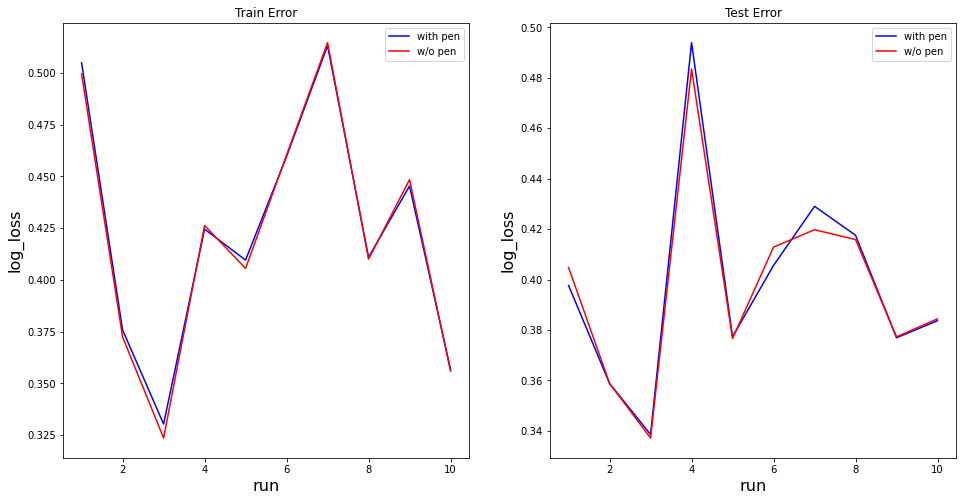

In [158]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))

r = np.arange(1, 11)
ax[0].plot(r, results_1_pen_df["min_train_err_cv"], color="blue", label="with pen")
ax[0].plot(r, results_2_pen_df["min_train_err_cv"], color="red", label="w/o pen")
ax[0].set_xlabel(r"run", fontsize=16)
ax[0].set_ylabel(r"log_loss", fontsize=16)
ax[0].set_title("Train Error")
ax[0].legend()

ax[1].plot(r, results_1_pen_df["test_err"], color="blue", label="with pen")
ax[1].plot(r, results_2_pen_df["test_err"], color="red", label="w/o pen")
ax[1].set_xlabel(r"run", fontsize=16)
ax[1].set_ylabel(r"log_loss", fontsize=16)
ax[1].set_title("Test Error")
ax[1].legend()

In [161]:
train_errs_cv, test_errs, train_ll_pen, test_ll_pen, \
    train_l1_pen, test_l1_pen, train_l2_pen, test_l2_pen, min_l1_vals, min_l2_vals, beta_val_3 = run_logisitic_reg_exp(X_train, X_test, y_train, y_test, assoc_mat, np.array([1.0]), l1_vals, np.logspace(0, 3, n_iter), l2_norm=False)

res_6_df = build_table_from_log(gamma, train_errs_cv, test_errs, train_ll_pen, test_ll_pen,
                                        train_l1_pen, test_l1_pen, min_l1_vals, train_l2_pen, test_l2_pen, min_l2_vals)

[2022-02-15 17:57:46.828302] - gamma - 1.00
Min l1: 0.01, Min l2: 1.0, CV Error: 0.6736272002738996, Test error: 0.46354633174518384
ll_pen_train: 0.6457429023772312, l1_pen_train: 0.05163624693630585, l2_pen_train: 0.01934741413377603


In [209]:
perfect_ll_train = np.zeros(100)
perfect_ll_test = np.zeros(100)

X_gen = np.zeros((n_sim, 10, 2200))
y_gen = np.zeros((n_sim, 12))

for i in range(100):
    X_exp, beta_exp, y_log_exp = generate_log_data(200, 10, tf_on=4, val_tf=[5, 5, 5, 5], n=200)
    # X_gen[i] = X_exp
    X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_exp, y_log_exp, test_size=0.5, shuffle=True)

    p_train = sigmoid(X_train_exp @ beta_exp)
    p_test = sigmoid(X_test_exp @ beta_exp)

    perfect_ll_train[i] = log_loss(y_train_exp, p_train)
    perfect_ll_test[i] = log_loss(y_test_exp, p_test)

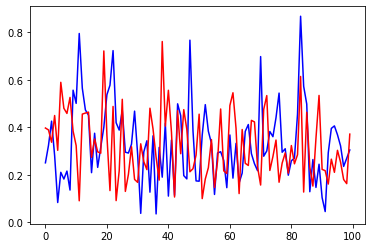

In [210]:
plt.plot(np.arange(0, 100), perfect_ll_train, color="blue")
plt.plot(np.arange(0, 100), perfect_ll_test, color="red")

In [211]:
np.mean(perfect_ll_train)

0.33081152108049694

In [212]:
np.mean(perfect_ll_test)

0.3231760212887346

In [178]:
np.allclose(y_gen[0], y_gen[2])

False